# This notebook generates protocol related images 

In [3]:
## plot
%matplotlib inline
import matplotlib.pyplot as plt

## operations
import numpy as np
from scipy.io import loadmat
from scipy import signal
from scipy.signal import butter, lfilter
from scipy import stats 

## time_frequency
from mne.time_frequency import tfr_array_multitaper, psd_array_multitaper



import pandas as pd

from statsmodels.formula.api import ols, mixedlm
import statsmodels.api as sm


## Custom made functions from 'util_functions.py' script
from util_functions import *

## Saving data dictionaries
import pickle  

# Load study related info

In [5]:
## Load study related info
with open('../Results/study_info.pickle', 'rb') as handle:
    study_info = pickle.load(handle,encoding='latin1')
    

dd             = study_info['dd'] ## Number of sensory cues (density)
dur            = study_info['dur'] ## Trial duration (sec)
K_i_idx        = study_info['K_i_idx']
K_i            = study_info['K_i']
uni            = study_info['uni']
t_dur          = study_info['t_dur']
t_dd           = study_info['t_dd']
sessions       = study_info['sessions'] 
ttl_idx        = study_info['ttl_idx']
hpc_electrodes = study_info['hpc_electrodes']



## Load trial markers for each session
with open('../Results/trials_markers.pickle', 'rb') as handle:
    trials_markers = pickle.load(handle,encoding='latin1')

((array([0, 1, 2, 0, 1, 0, 2, 1, 2]), array([0, 0, 0, 1, 1, 2, 1, 2, 2])),
 (array([0, 1, 2, 0, 1, 2, 0, 1, 2]), array([0, 0, 0, 1, 1, 1, 2, 2, 2])))

# Plot trial condition type

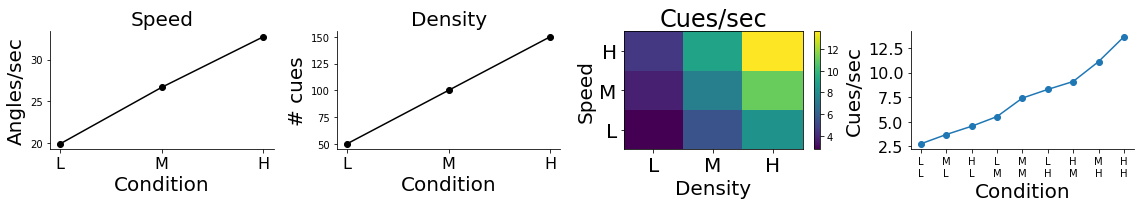

In [19]:
lmh_labels = ['L','M','H']


fig , ax = plt.subplots(1,4)
fig.set_figheight(3)
fig.set_figwidth(16)

fig.set_facecolor('white')

plt.sca(ax[0])    
plt.plot(t_dur,'-ok')
plt.ylabel('Angles/sec', fontsize=20)
plt.title('Speed', fontsize=20)

plt.sca(ax[1])
plt.plot(t_dd,'-ok')
plt.title('Density', fontsize=20)
plt.ylabel('# cues', fontsize=20)



for ii in range(2):
    ax[ii].spines['right'].set_visible(False)
    ax[ii].spines['top'].set_visible(False)
    plt.sca(ax[ii])
    plt.xticks(range(3),lmh_labels, fontsize=16)
    plt.xlabel('Condition', fontsize=20)

    
    
###### pcolor
plt.sca(ax[2])
plt.pcolor(K_i, cmap=None)
plt.colorbar()
plt.title('Cues/sec', fontsize=24)
plt.xticks(np.arange(3)+.5,lmh_labels, fontsize=20 )
plt.yticks(np.arange(3)+.5,lmh_labels, fontsize=20 )

plt.ylabel('Speed', fontsize=20)
plt.xlabel('Density', fontsize=20)



###### cues/sec line plot
plt.sca(ax[3])
plt.plot(uni, '-o')
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Cues/sec', fontsize=20)
plt.yticks(fontsize=16)

cue_sec_xticks = []
for ii in range(len(K_i_idx[0])):
    cue_sec_xticks.append( str( ['L','M','H'][K_i_idx[0][ii]]  )+'\n'+str(  ['L','M','H'][K_i_idx[1][ii]]   )   )

plt.xticks( np.arange(len(uni)), cue_sec_xticks, fontsize=10)

ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('../Figures/experimental_conditions_illustration.pdf')

# Plot LFP example

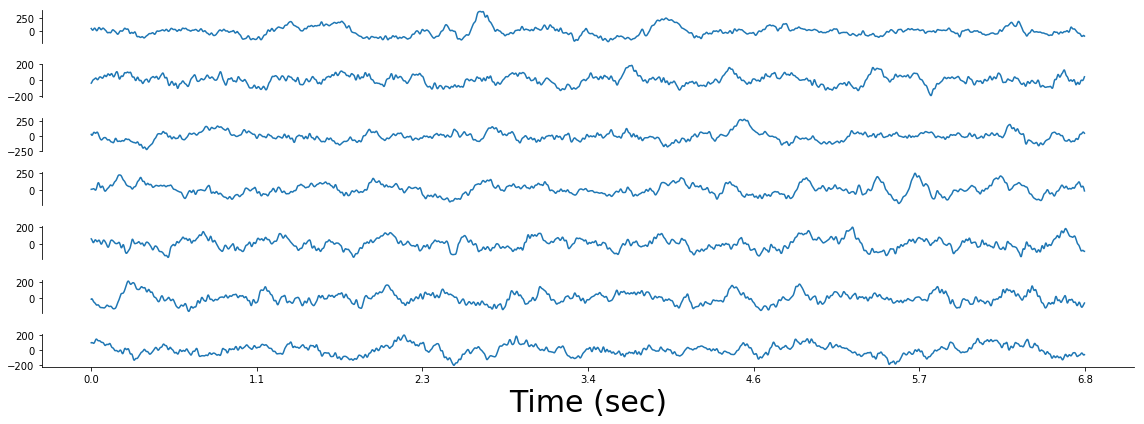

In [26]:
# for sub in range(len(sessions)):
sub = 2
    
lfp = loadmat('../Data/'+sessions[sub]+'.mat')
lfp = lfp['ourData']

idx_trials = trials_markers[sessions[sub]]

fs = 512.

fig , ax = plt.subplots(7,1)
fig.set_figheight(6)
fig.set_figwidth(16)
fig.set_facecolor('white')

plot_counter = 0

for cc in [hpc_electrodes[sub][0]]:

    for trial in  range(len(idx_trials)):
        
        if trial in [ 1,2,4, 6, 9, 10, 11 ]: 

            if trial == len(idx_trials)-1: tmp_lfp =  lfp[cc][ idx_trials[trial] : idx_trials[trial] + 2500   ] ## to set an end marker to the last trial            
            else: tmp_lfp =  lfp[cc][ idx_trials[trial] : idx_trials[trial+1]   ]
                
                
            
            ax[plot_counter].spines['right'].set_visible(False)
            ax[plot_counter].spines['top'].set_visible(False)

            ax[plot_counter].plot(tmp_lfp[500:4000])
            
            if plot_counter < 6: 
                ax[plot_counter].spines['bottom'].set_visible(False)
                ax[plot_counter].set_xticks([])
                
            else:
                plt.sca(ax[plot_counter])
                plt.xticks(  np.linspace(0,len(tmp_lfp[500:4000]),7) ,  np.round(np.linspace(0,len(tmp_lfp[500:4000]),7)/fs, 1   )   )
                plt.xlabel('Time (sec)', fontsize=30)

            plot_counter += 1
        
plt.tight_layout()
plt.savefig('../Figures/LFP_illustration.pdf')